In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#For Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#Checking the shape of the data
data.shape

(144, 1)

In [3]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


## Missing Values

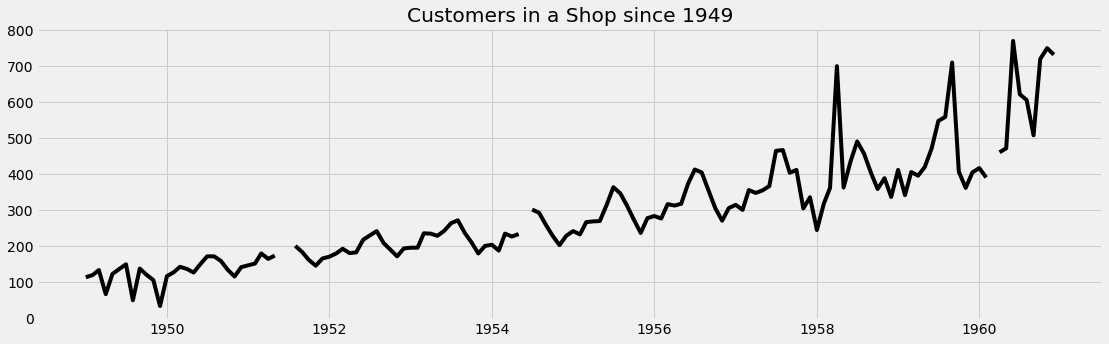

In [4]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Customers in a Shop since 1949")
plt.show()

## Linear Interpolation

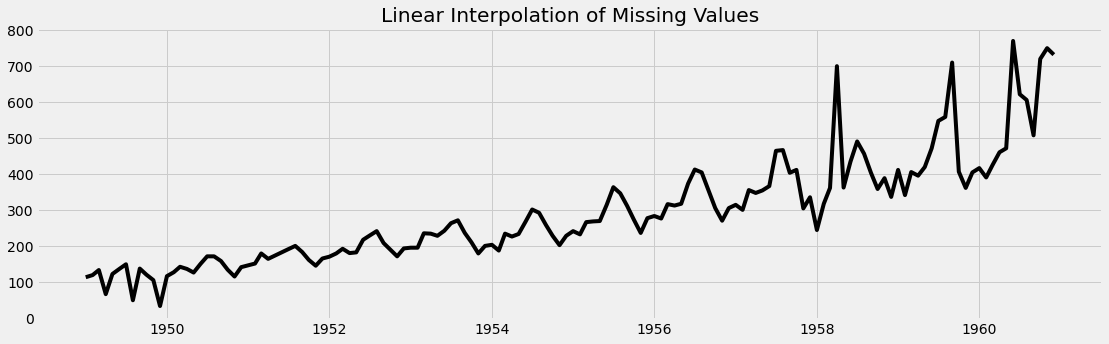

In [5]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Time Series Decomposition

### Additive Seasonal Decomposition

In [6]:
import statsmodels.api as sm

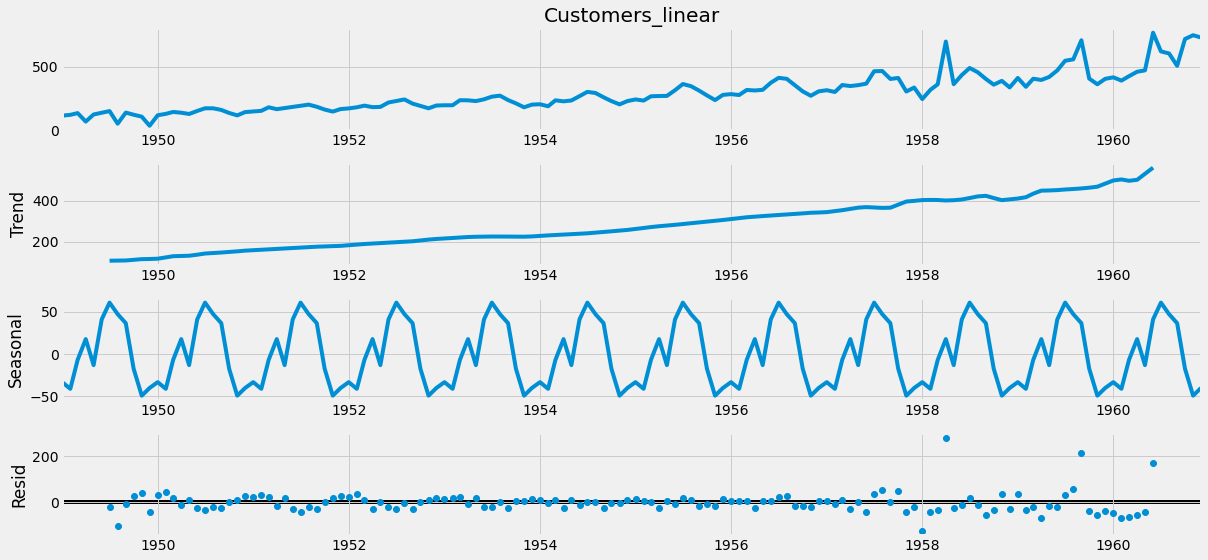

In [7]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

### Multiplicative seasonal decomposition

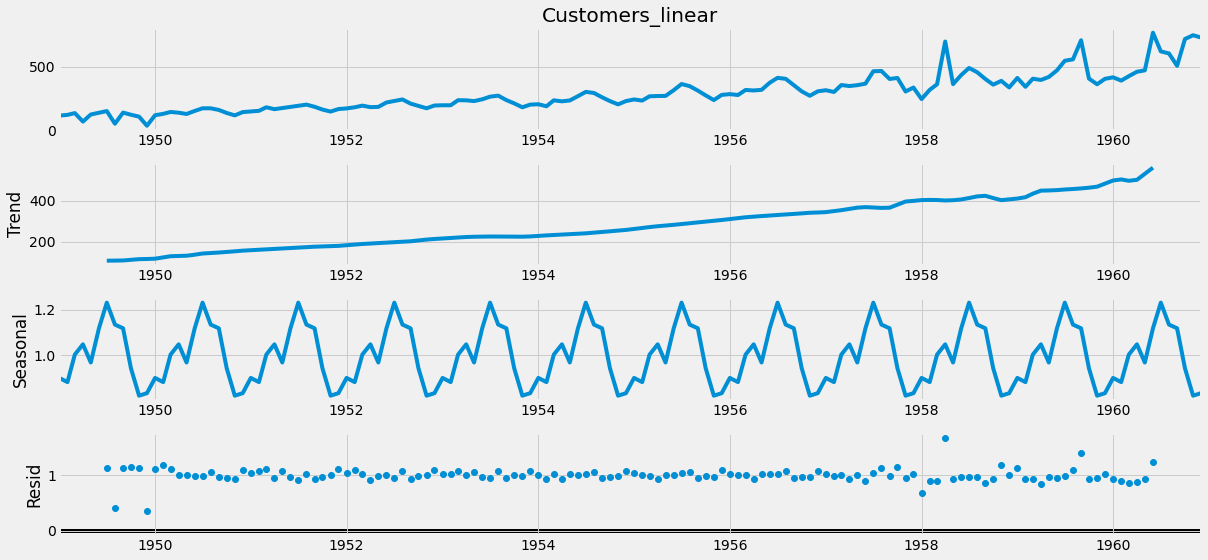

In [8]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting train and test data

We Split the data into train and test.
First 115 rows as the train data and rest other as test data

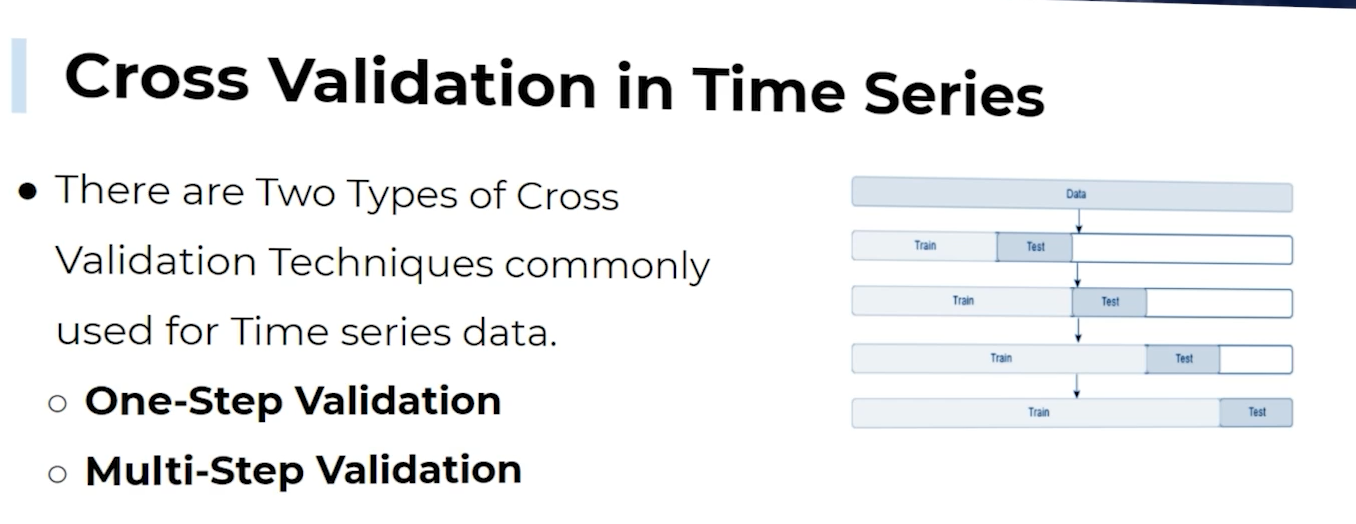

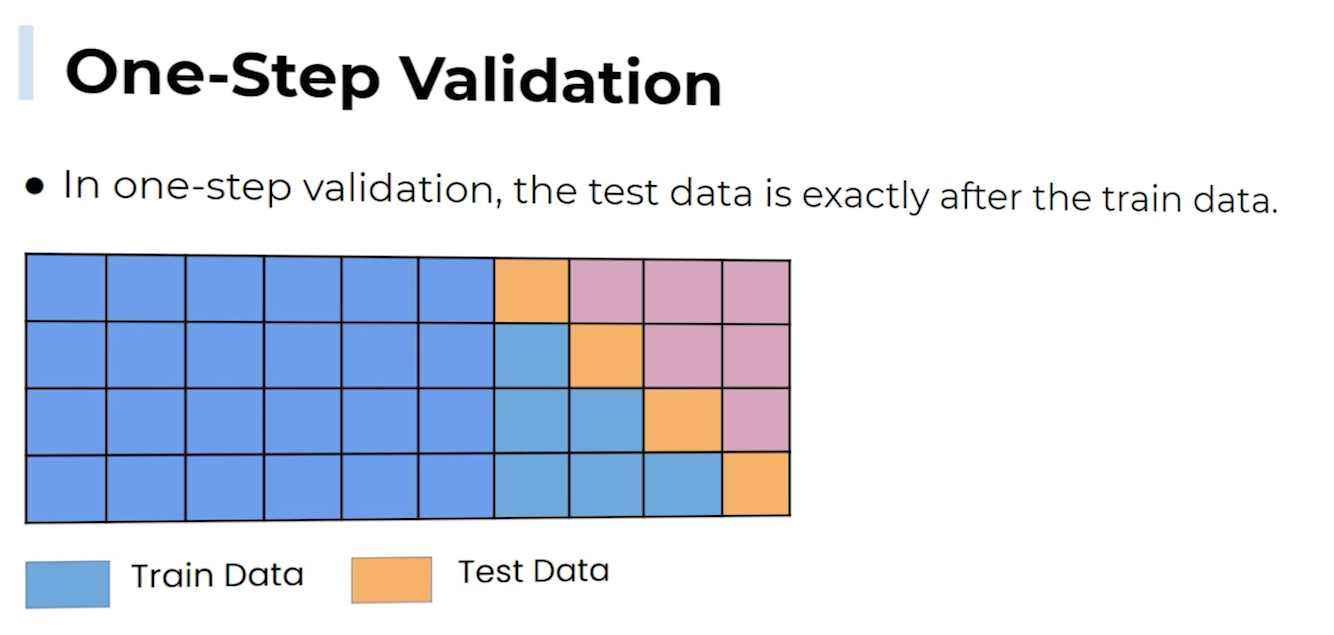

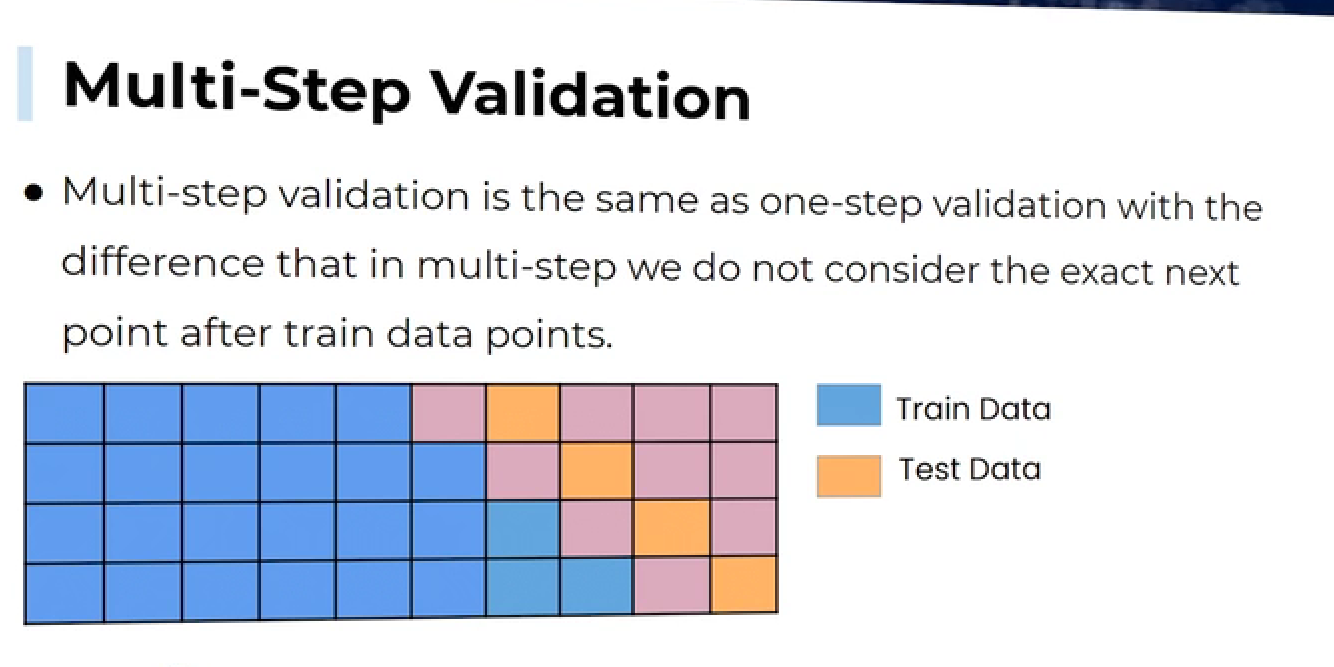

In [9]:
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [12]:
test

,Customers,Customers_linear
Date,,
1958-08-01,457.0,457.0
1958-09-01,404.0,404.0
1958-10-01,359.0,359.0
1958-11-01,389.0,389.0
1958-12-01,337.0,337.0
1959-01-01,412.0,412.0
1959-02-01,342.0,342.0
1959-03-01,406.0,406.0
1959-04-01,396.0,396.0


In [13]:
# lets check the shape of train

print(train.shape)
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]
train.tail()

(115, 2)


,Customers,Customers_linear
Date,,
1958-03-01,362.0,362.0
1958-04-01,700.0,700.0
1958-05-01,363.0,363.0
1958-06-01,435.0,435.0
1958-07-01,491.0,491.0


In [14]:
# lets check the shape of test

print(train.shape)
test.head()

(115, 2)


,Customers,Customers_linear
Date,,
1958-08-01,457.0,457.0
1958-09-01,404.0,404.0
1958-10-01,359.0,359.0
1958-11-01,389.0,389.0
1958-12-01,337.0,337.0
